In [14]:
# create our machine learning models

import pandas as pd
import numpy as np
import sklearn as sk

print('pandas ', pd.__version__)
print('numpy ', np.__version__)
print('sklearn', sk.__version__)

pandas  1.1.3
numpy  1.19.2
sklearn 0.23.2


In [15]:
data = pd.read_csv('data/data.csv')
data.shape

(2208, 23)

In [16]:
y = data['Attrition']
print(y)
print(type(y))

0       1
1       0
2       1
3       0
4       0
       ..
2203    1
2204    1
2205    1
2206    1
2207    1
Name: Attrition, Length: 2208, dtype: int64
<class 'pandas.core.series.Series'>


In [17]:
X = data.drop(columns =['Attrition'])
print(X)
print(type(y))

       0     1   2     3  4  5  6  7  8  9  ...  12  13  14  15  16  17  18  \
0     41  1102   1     1  2  3  2  7  4  2  ...   8   1   1   0   8   0   6   
1     49   279   8     2  3  2  2  6  2  1  ...   1   0   4   1  10   3  10   
2     37  1373   2     4  4  2  1  2  3  2  ...   6   1   2   0   7   3   0   
3     33  1392   3     5  4  3  1  6  3  1  ...   1   1   3   0   8   3   8   
4     27   591   2     7  1  3  1  2  2  1  ...   9   0   4   1   6   3   2   
...   ..   ...  ..   ... .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
2203  35   634  18  1373  3  3  1  6  2  1  ...   0   0   2   0   5   0   4   
2204  31   375  22  1450  3  3  2  4  3  1  ...   1   1   3   1  10   3  10   
2205  32   867  21  1368  1  2  1  6  2  2  ...   0   0   3   0  14   2  13   
2206  49   983   5  1369  2  2  3  7  1  1  ...   9   0   3   0  10   2   8   
2207  39   705   4  1532  3  2  1  8  3  1  ...   4   0   3   0  10   3   4   

      19  20  21  
0      4   0   5  
1      7   1 

In [18]:
# convert X and y to numpy arrays

y = np.asarray(y)
X = np.asarray(X)
print(y)
print(type(y))
print(y.shape)

print(X)
print(type(X))
print(X.shape)

[1 0 1 ... 1 1 1]
<class 'numpy.ndarray'>
(2208,)
[[  41 1102    1 ...    4    0    5]
 [  49  279    8 ...    7    1    7]
 [  37 1373    2 ...    0    0    0]
 ...
 [  32  867   21 ...    8    8    8]
 [  49  983    5 ...    7    6    5]
 [  39  705    4 ...    3    3    3]]
<class 'numpy.ndarray'>
(2208, 22)


In [19]:
from sklearn.model_selection import train_test_split

random_seed = 30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=random_seed)

numerator = y_train[y_train == 1].sum()
denominator = len(y_train)
print("\n", numerator/denominator * 100, " percent of training data is in class 1")


 49.62686567164179  percent of training data is in class 1


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train logistic regression model (with default regularization) for binary classification
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_knn = knn_model.predict(X_test)
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print('\nTest accuracy: '+str(knn_test_accuracy))


Test accuracy: 0.8313253012048193


# Decision Tree

In [30]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=10, 
                              random_state=2)
tree.fit(X_train, y_train)


y_pred_tree = tree.predict(X_test)
tree_test_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
print("Test accuracy: "+str(tree_test_accuracy))

Test accuracy: 0.8253012048192772


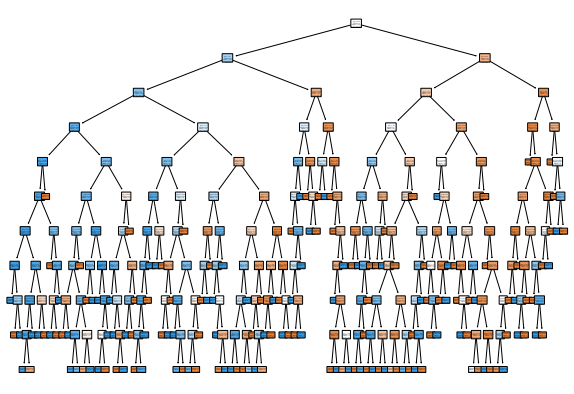

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Yes', 
                       'No']) 

plt.show()

# SVM

In [32]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.7710843373493976
